# IML Assignment 1

## Name: Polina Pushkareva


## Mail: p.pushkareva@innopolis.university


## Group: SD-03

## Task 1

### 3.1. Linear Regression
#### Data reading

In [3]:
import pandas as pd

# Data loading
df = pd.read_csv('train_1.csv', index_col=0)
# Data splitting into features (X1-X4) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### Train\validation splitting

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=42)

#### Linear regression model fitting

In [5]:
from sklearn.linear_model import LinearRegression


# Declaring and training a linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predicting the label on the validation set
y_pred_lr = linear_model.predict(X_test)

#### Linear regression model prediction & Evaluation


In [6]:
from sklearn import metrics
import numpy as np

def print_metrics(y_actual, y_pred):
    """
    Print MSE, RMSE, MAE and R2 score.

    Keyword arguments:
    y_actual -- actual label values
    y_pred -- predicted by the model label values
    """
    print(f'MSE = {metrics.mean_squared_error(y_actual, y_pred)}')
    print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y_actual, y_pred))}')
    print(f'MAE = {metrics.mean_absolute_error(y_actual, y_pred)}')
    print(f'R2 score = {metrics.r2_score(y_actual, y_pred)}')


print("Evaluation of linear regression:\n")
print_metrics(y_test, y_pred_lr)

Evaluation of linear regression:

MSE = 5682.794445664434
RMSE = 75.3843116680416
MAE = 62.89471820819896
R2 score = 0.8560711773282679


### 3. 2 Polynomial Regression
#### Constructing the polynomial regression pipeline

In [7]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [8]:
# Constructing a polynomial regression pipeline
pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=2)),
                     ("linear_regression", LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [9]:
from sklearn.model_selection import GridSearchCV

# Declaring a GridSearch instance with asked parameters
param_grid = {'polynomial_features__degree' : range(2, 6)}
search = GridSearchCV(estimator=pipeline,
                      param_grid=param_grid, cv=8,
                      scoring='neg_mean_squared_error')

# Training the GridSearch
search.fit(X, y)

# Finding the optimum degrees
print(f"Best parameter: {search.best_params_}" )
# Printing the GridSearchCV score
print(f"search score: {search.best_score_}")

Best parameter: {'polynomial_features__degree': 4}
search score: -0.41566371977110306


In [10]:
# Predicting the label using the best parameters from GridSearch
y_pred = search.predict(X_test)
print("Evaluation of best polynomial regression:\n")
print_metrics(y_test, y_pred)

Evaluation of best polynomial regression:

MSE = 0.07737077963682537
RMSE = 0.2781560346942438
MAE = 0.21397849966341864
R2 score = 0.9999980404209006


#### Save the model

In [11]:
import pickle

# Saving the GridSearch model for evaluation
filename = 'poly_optimized_model.sav'
pickle.dump(search, open(filename, 'wb'))

### 3.3 Determine the linear dependent features

Use the following code cell to determine a pair of features from the training dataset that are correlated to each other. Explain your choise in the markdown cell.

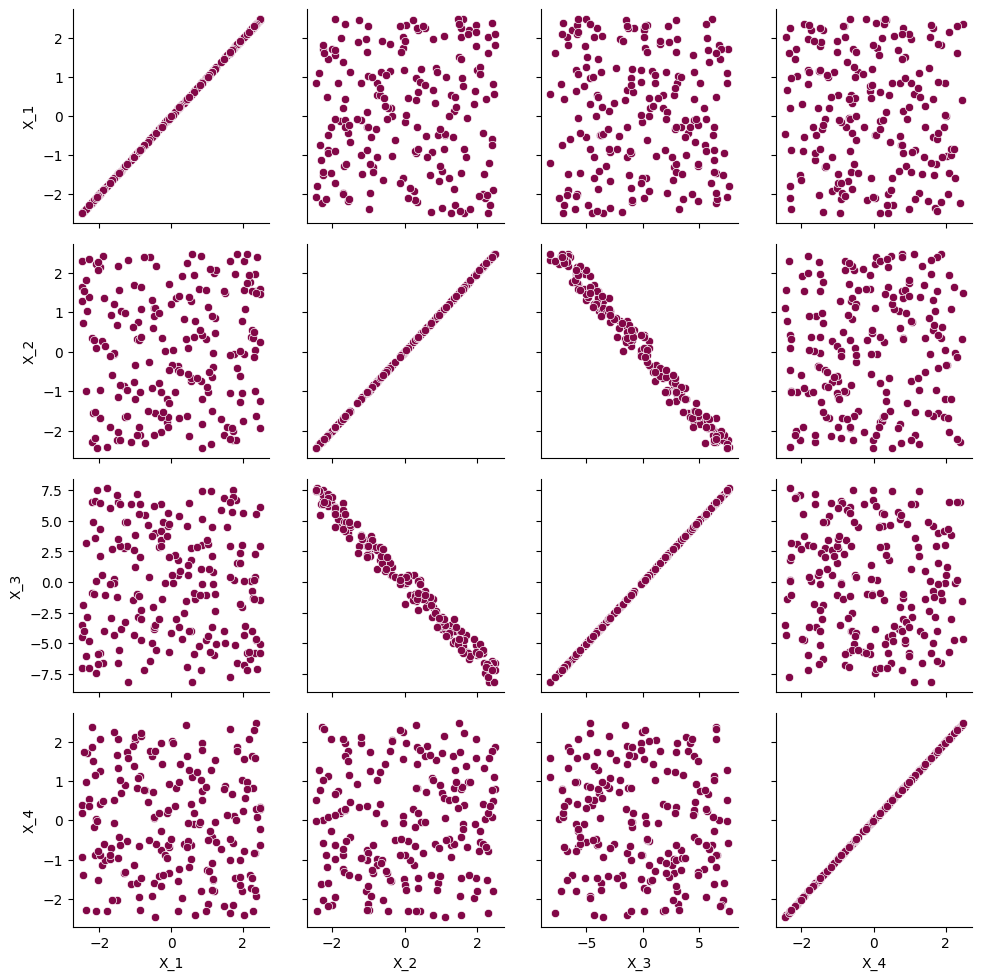

In [12]:
import seaborn as sns

# Visualizing og features (in)dependencies
# Source on PairGrid plot: https://seaborn.pydata.org/generated/seaborn.PairGrid.html
sns.PairGrid(df.iloc[:, :-1]).map(sns.scatterplot, color='xkcd:red purple')

From the graphs above it is seen that the data includes one pair of dependent features which are X_2 and X_3. Those features are dependent because they form a graph on the coordinate space similar to the linear function. At the same other pairs randomly fill the space with the points.


## Task 2

### 4.1 Data processing
#### Loading the dataset

In [13]:
import pandas as pd

#### Exploring the dataset  and removing 2 redundant features

In [14]:
# Data loading
df = pd.read_csv('pokemon_modified.csv')

# Exploring the dataset
print(df.info())
print(df.head())

# Checking the number of unique entries in candidate columns to drop
print(f"\nNumber of unique 'name' entries: {len(df['name'].unique())}/801")
print(f"Number of unique 'classification' entries: {len(df['classification'].unique())}/801")
print(f"Number of unique 'type1' entries: {len(df['type1'].unique())}/801\n")

# Removing redundant features
df = df.drop(['name', 'classification'], axis=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.7,45,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,60,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,2.0,80,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.6,39,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,1.1,58,88.1,fire,80,65,80,19.0,1,0


I decided to drop 'name' column because it contains 801 out of 801 unique entries for each pokemon which is useless for classification, as there is no dependency between the name and legendarity of the pokemon.

Also l dropped 'classification' column because it contains information similar to 'type1' column. While the 'type1' contains only 17/801 unique entries, the 'classification' contains 588/801 uhique ones. This means that the 'type1' column will give the model more relevant meaning in case of classification on legendarity.

#### Splitting the data
Use random_state = 123, stratify, and set test_size = 0.2

In [15]:
from sklearn.model_selection import train_test_split

# Data splitting into features (X) and labels (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the data into train and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123,
                                                    test_size=0.2, stratify=y)

Check if the dataset is balanced or not and comment on it

In [16]:
# Checking if the dataset (original one, train, and test) is balanced
print(f'Percentage of legendary pokemons in initial data: {y.sum()/y.size}')
print(f'Percentage of legendary pokemons in train data: {y_train.sum()/y_train.size}')
print(f'Percentage of legendary pokemons in test data: {y_test.sum()/y_test.size}')

Percentage of legendary pokemons in initial data: 0.08739076154806492
Percentage of legendary pokemons in train data: 0.0875
Percentage of legendary pokemons in test data: 0.08695652173913043


The dataset is not balanced in terms of classe because it contains only ~9% of legendary pokemons. So, stratify helps to preserve this imbalance in the train and test data.

#### Checking for missing values

In [17]:
# Checking for missing values
null_values = X_train.isnull().sum()
print(f'Missing values in the table with two dropped columns:\n')
print(null_values[null_values > 0])

null_values = X_test.isnull().sum()
print(f'\nMissing values in the table with two dropped columns:\n')
print(null_values[null_values > 0])

Missing values in the table with two dropped columns:

height_m           16
percentage_male    83
weight_kg          16
dtype: int64

Missing values in the table with two dropped columns:

height_m            4
percentage_male    15
weight_kg           4
dtype: int64


#### Impute the missing values

In [18]:
from sklearn.impute import SimpleImputer

# Refernce for this code fragment is Lab-3 (Data preprocessing)

# Define a SimpleImputer instance with 'mean' strategy
imputer = SimpleImputer(strategy='mean')

# Imputing missing values
nan_columns = ['height_m', 'weight_kg', 'percentage_male']
X_train[nan_columns] = imputer.fit_transform(X_train[nan_columns])
X_test[nan_columns] = imputer.fit_transform(X_test[nan_columns])

#### Double check that there are no missing values

In [19]:
# Double checking for missing values
null_values = X_train.isnull().sum()
print(f'Missing values in the table with two dropped columns:\n')
print(null_values[null_values > 0])

null_values = X_test.isnull().sum()
print(f'\nMissing values in the table with two dropped columns:\n')
print(null_values[null_values > 0])

Missing values in the table with two dropped columns:

Series([], dtype: int64)

Missing values in the table with two dropped columns:

Series([], dtype: int64)


#### Encode categorically

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Refernce for this code fragment is Lab-3 (Data preprocessing)

def ohe_new_features(df, features_name, encoder):
    """
    OneHot encoder for categorical features.

    Keyword arguments:
    df -- DataFrame to encode
    features_name -- categorical features names to encode
    encoder -- encoder instance
    """
    new_feats = encoder.transform(df[features_name])
    # Creating dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats,
                            columns=encoder.get_feature_names_out(features_name))
    new_cols.index = df.index
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


# Defining encodere instance
encoder = OneHotEncoder(sparse_output=False,
                        drop='first',
                        handle_unknown='ignore')

# The only categorical feature to encode left is 'type1' (others were dropped)
f_names = ['type1']
encoder.fit(X_train[f_names])
X_train = ohe_new_features(X_train, f_names, encoder)
X_test = ohe_new_features(X_test, f_names, encoder)

#### Scale the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Refernce for this code fragment is Lab-3 (Data preprocessing)

# Defining a MinMaxScaler instance and fitting
scaler = MinMaxScaler()
scaler.fit(X_train)

# Applying the scaler on both train and test features
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.2,0.200000,0.5,0.500,0.200000,0.500,0.000000,0.066667,0.25,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.2,0.466667,0.5,0.250,0.066667,0.125,0.066667,0.200000,0.50,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.200000,0.5,0.250,0.200000,0.500,0.200000,0.200000,0.00,0.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.200000,0.5,0.000,0.200000,0.250,0.200000,0.200000,0.25,0.466667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.2,0.200000,0.5,0.250,0.200000,0.500,0.066667,0.066667,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,0.2,0.200000,0.5,0.500,0.200000,0.250,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,0.2,0.200000,0.5,0.125,0.066667,0.125,0.466667,0.466667,0.25,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.2,0.200000,0.5,0.000,0.200000,0.125,0.466667,0.466667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### <span style="color:red">Correlation matrix</span>

Are there highly co-related features in the dataset? Is it a problem? Explain in the markdown cell.

<Axes: >

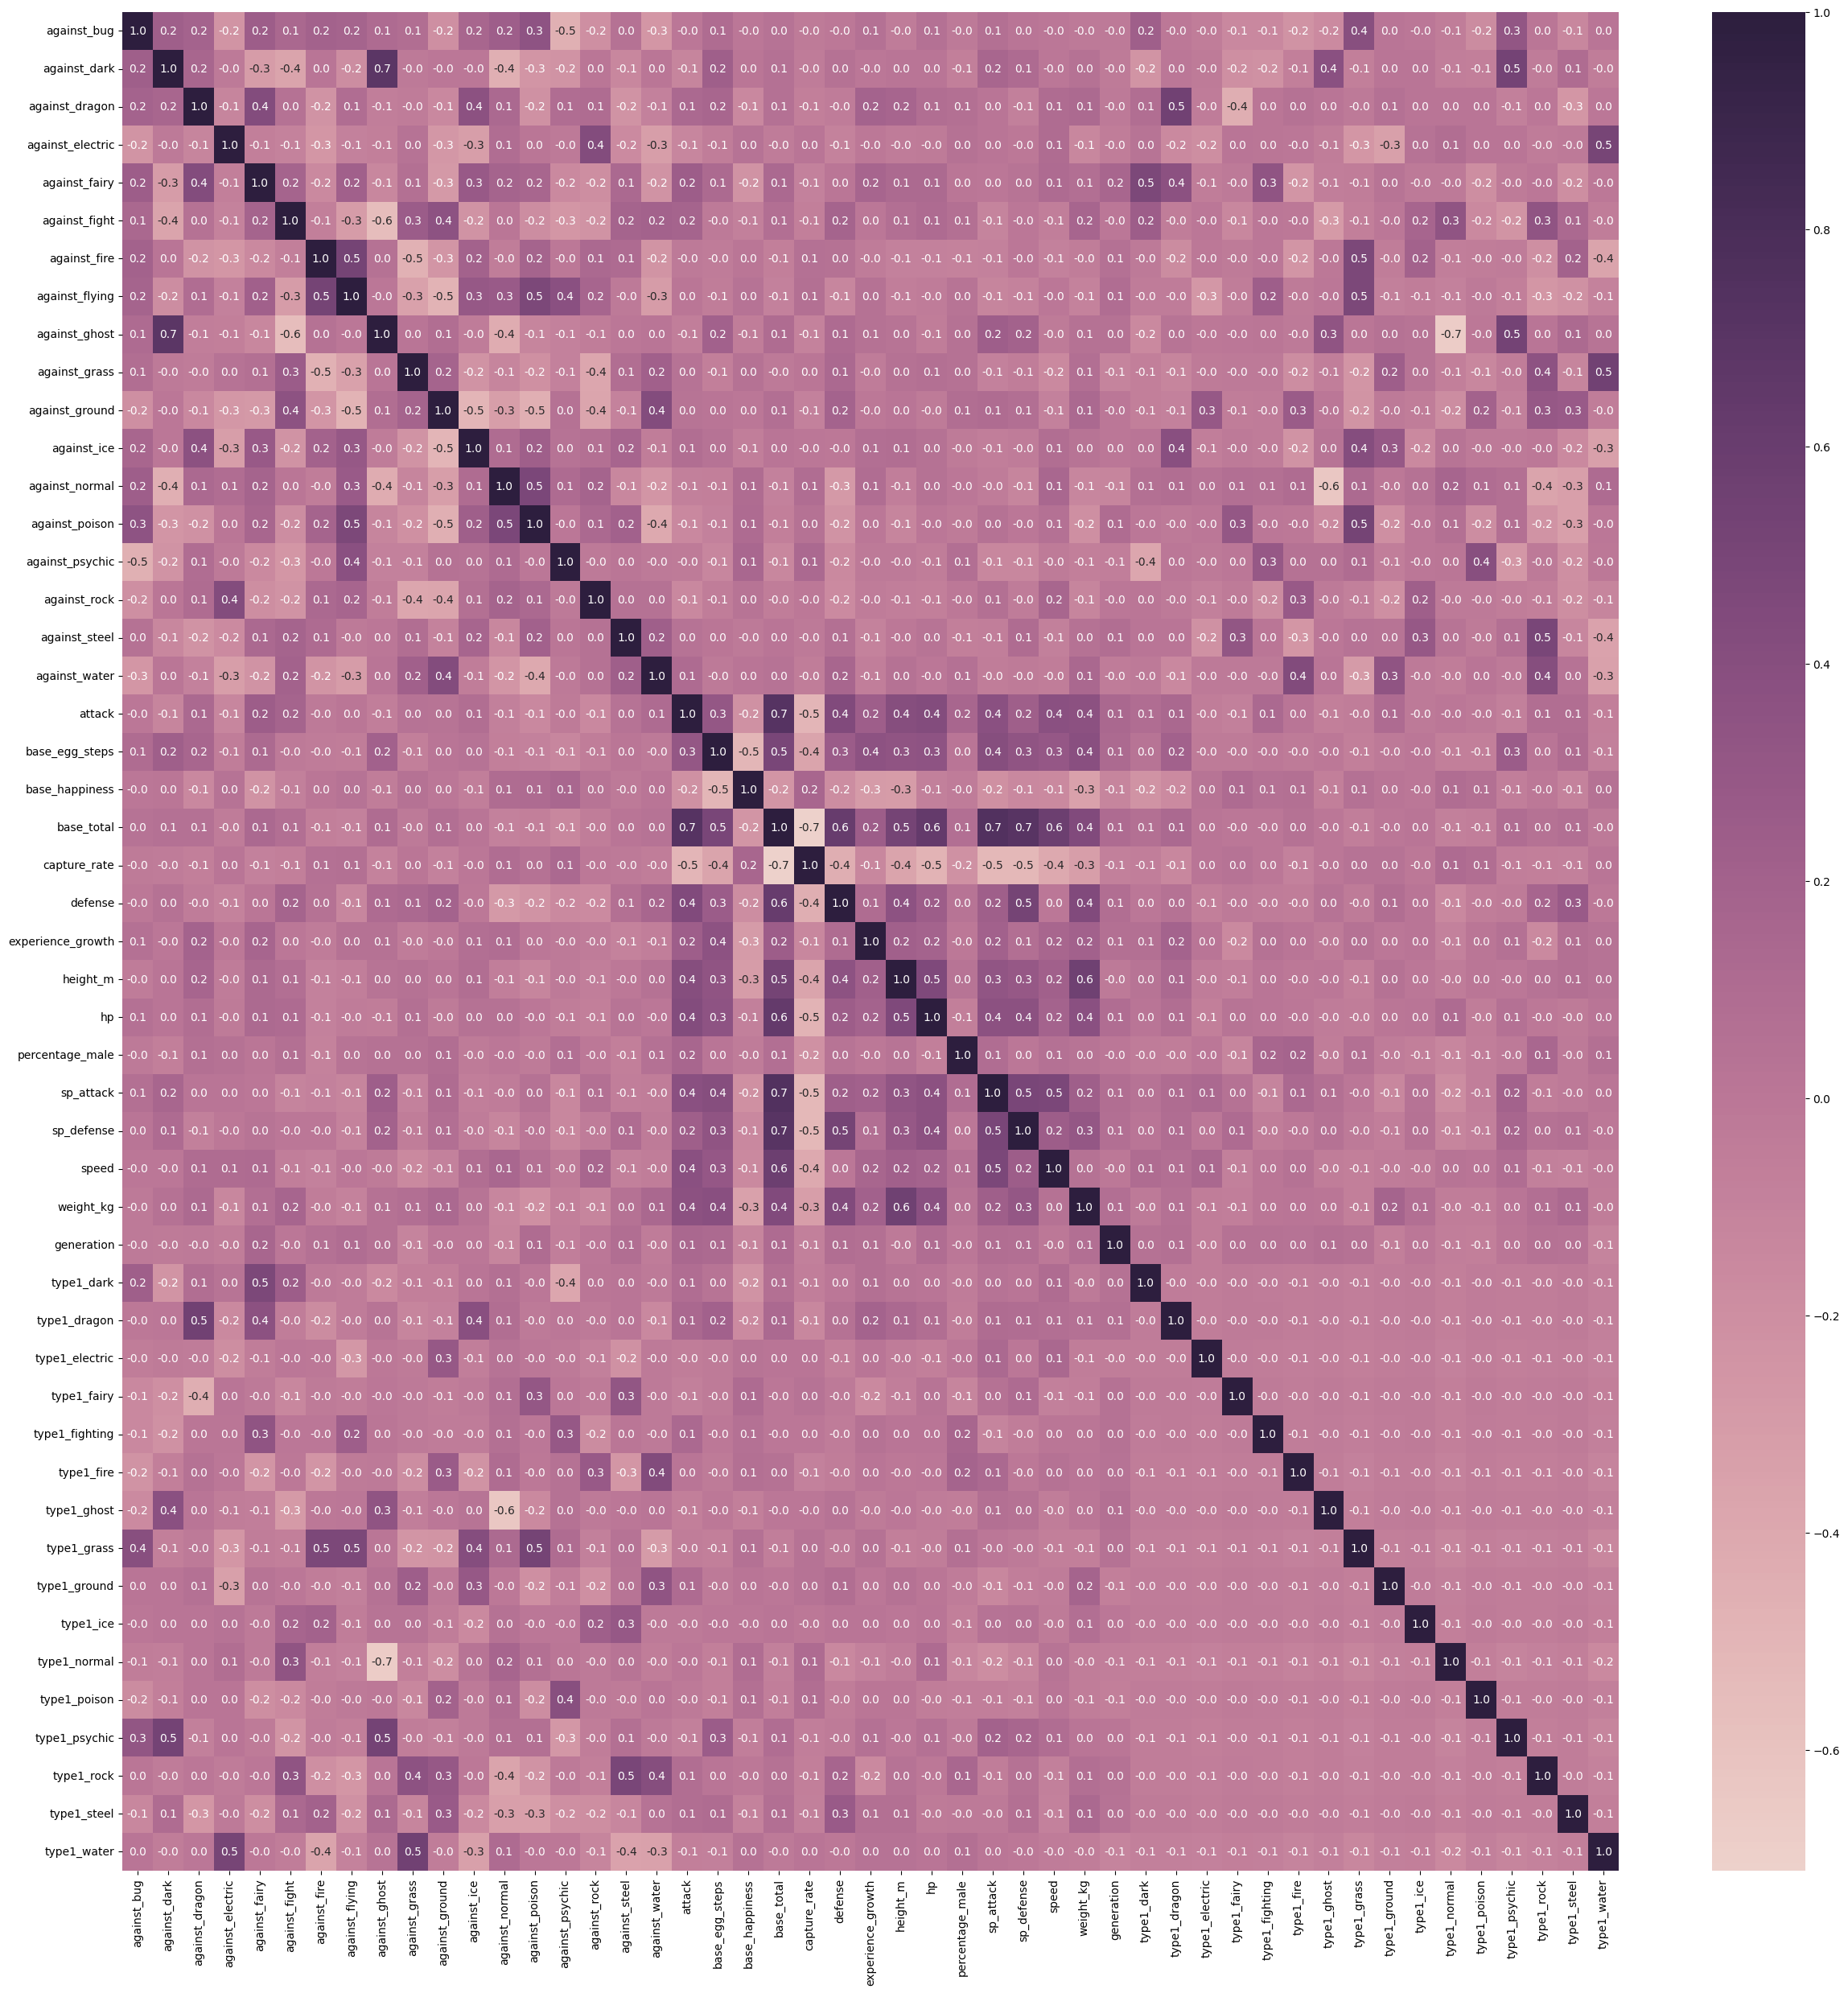

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))

# Plotting the correlation matrix
sns.heatmap(X_train.corr(), annot=True,
            fmt=".1f", cmap=sns.cubehelix_palette(as_cmap=True))

There are some pairs of features correlating in 0,4-0,7 in absolute value maximim. This is not a big problem because they are only the smallest part of all pairs of features and correlate no so much. So, those correlations influence the model not so hard.

### 4.2 Model fitting and Comparison

#### Tuning LR model

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_clf_metrics(y_actual, y_pred):
    """
    Caclulate and print classification metrics: accuracy, precision,
    recall, and F1 score.

    Keyword arguments:
    y_actual -- actual lable values
    y_pred -- predicted lable values
    """
    print(f'Accuracy: {accuracy_score(y_actual, y_pred)}')
    print(f'Precision: {precision_score(y_actual, y_pred)}')
    print(f'Recall: {recall_score(y_actual, y_pred)}')
    print(f'F1 score: {f1_score(y_actual, y_pred)}')


In [24]:
import numpy as np

# Specifying GridSearchCV parameters for Logistic Regression model
parameters = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-3, 3, 7),
              'solver' : [ 'liblinear']},
              {'penalty' : ['l2'], 'C' : np.logspace(-3, 3, 7),
              'solver' : ['newton-cg', 'lbfgs', 'liblinear']}]

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Declaring and training Logistic Regression model inside GridSearchCV
lr_clf_gs = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                         param_grid=parameters, scoring='f1')
lr_clf_gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='f1')

In [26]:
print("Tuned Hyperparameters :", lr_clf_gs.best_params_)
print("Accuracy :", lr_clf_gs.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9339047619047619


#### Construct a LR with the best params and Evaluate the LR with the best params

In [27]:
# Constructing, training, and predicting labels for LR with best parameters
lr_clf = LogisticRegression(C=10.0, penalty='l1', solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_y_pred = lr_clf.predict(X_test)

In [28]:
# Evaluating Logistic Regression model with best parameters
print_clf_metrics(y_test, lr_y_pred)

Accuracy: 0.9875776397515528
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 score: 0.9285714285714286


#### Print the top 5 most influencing features and the top 5 ignored features

In [29]:
print(f'Logistic Regression coefficients:\n{lr_clf.coef_}\n')
values = lr_clf.coef_[0]
columns = X_train.columns
features = pd.Series(abs(values), columns)
features = features.sort_values(axis=0)

# Printing the top 5 influencing features
print("Top 5 most influencing features:")
print(features.iloc[-5:])

# Printing the top 5 ignored features
print("\nTop 5 ignored features:")
print(features.iloc[:5])

Logistic Regression coefficients:
[[  0.           0.          -6.55251958   0.           0.
   -1.42335168   0.           0.           0.           0.
    0.           0.           0.           0.           0.
   -2.06647341   0.           0.           0.18362066  13.61123528
    0.64213876   7.46727487 -10.59632611   0.           7.63554552
   -2.74387197   0.          -2.2424614    0.           0.
    5.53468033   0.           1.81721073   0.           0.
    0.          -0.8855589    0.           3.20227431  -0.48324565
    0.93137209   0.           1.18794574  -9.64863082   0.
    0.           0.          -0.55273022   1.84046042]]

Top 5 most influencing features:
base_total            7.467275
experience_growth     7.635546
type1_normal          9.648631
capture_rate         10.596326
base_egg_steps       13.611235
dtype: float64

Top 5 ignored features:
against_bug       0.0
sp_defense        0.0
type1_fighting    0.0
defense           0.0
type1_ground      0.0
dtype: float64


#### Tuning KNN model

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Declaring and training KNN model inside GridSearchCV
param_grid = {'n_neighbors' : list(range(1, 15)),
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'chebyshev', 'cosine']}
knn_clf_gs = GridSearchCV(estimator=KNeighborsClassifier(),
                          scoring='accuracy',
                          param_grid=param_grid)
knn_clf_gs.fit(X_train, y_train)

print("Tuned Hyperparameters :", knn_clf_gs.best_params_)
print("Accuracy :", knn_clf_gs.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.95


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [31]:
# Constructing, and training KNN model with best parameters
knn_clf = KNeighborsClassifier(metric='cosine', n_neighbors=1, weights='uniform')
knn_clf.fit(X_train, y_train)

# Predicting labels for LR with best parameters
knn_y_pred = knn_clf.predict(X_test)

# Evaluating KNN model with best parameters
print_clf_metrics(y_test, knn_y_pred)

Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1 score: 0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset

In [32]:
from sklearn.naive_bayes import GaussianNB

# Declaring and training Gaussian Naive-Bayes model
gauss_nb_clf = GaussianNB().fit(X_train, y_train)

# Predicting labels for Gaussian Naive-Bayes model
gauss_y_pred = gauss_nb_clf.predict(X_test)

# Evaluating Gaussian Naive-Bayes model with best parameters
print_clf_metrics(y_test, gauss_y_pred)

Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1 score: 0.717948717948718


#### Which metric is most appropriate for this task and why?

Accuracy is not an appropriate metrics for this task, because of imbalanced data. (The model which always states that the pokemon is non-legendary will provide 91% accuracy). Precision and recall are also not suitable because they both are important and we cannot distinguish between them. However, F1 score combines precision and recall therefore provides good metrics in case of identifying legendary pokemons.

For this dataset both false negatives and false positives can be critical or not, it depends on the application. However, I think false negatives are more critical because they entail loss of legendary pokemons. Legendary pokemons rare, so it can be useful to analyze them in some way.


#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? Explain

In [33]:
# TODO Write your code here
print('Overall Metrics:\n Logistic Regression:')
print_clf_metrics(y_test, lr_y_pred)
print('\n KNN:')
print_clf_metrics(y_test, knn_y_pred)
print('\n Gaussian Naive-Bayes')
print_clf_metrics(y_test, gauss_y_pred)

Overall Metrics:
 Logistic Regression:
Accuracy: 0.9875776397515528
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 score: 0.9285714285714286

 KNN:
Accuracy: 0.9751552795031055
Precision: 1.0
Recall: 0.7142857142857143
F1 score: 0.8333333333333333

 Gaussian Naive-Bayes
Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1 score: 0.717948717948718


As l explained earlier, F1 score is the most approproiate metrics for this task. Therefore, in case of classification of (non-)legandary pokemons Logistic Regression is the best model because it has the highest F1 score.

## 5. Bonus Task

#### Loading the Dataset

In [34]:
import pandas as pd

# Data loading
train_data = pd.read_csv('bonus_train.csv')
test_data = pd.read_csv('bonus_test.csv')

In [35]:
# Splitting the data into test and validation datasets
X_train, X_test = train_data.iloc[:, :-1], test_data.iloc[:, :-1]
y_train, y_test = train_data.iloc[:, -1], test_data.iloc[:, -1]

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

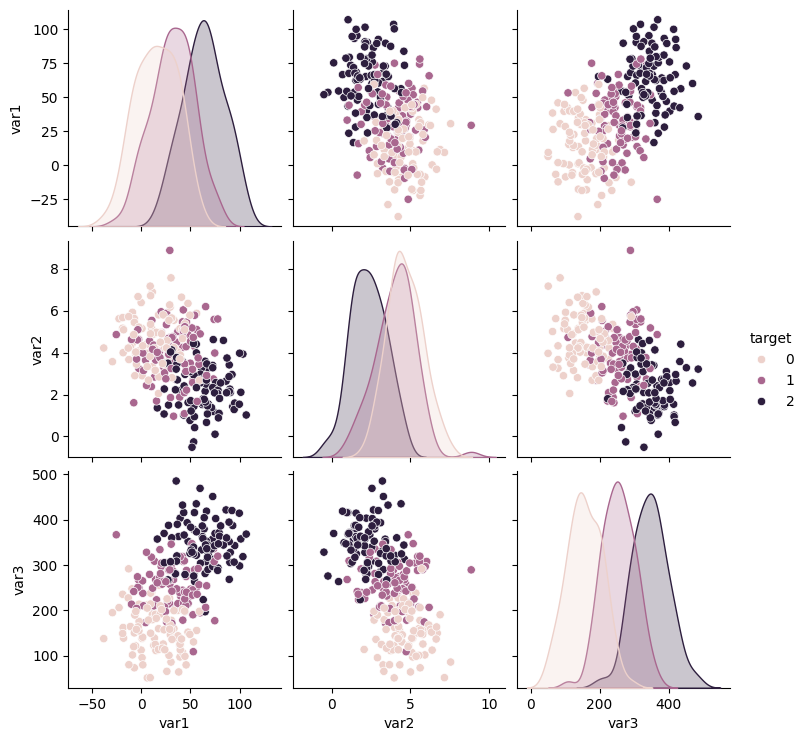

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the training data using the pairplot
sns.pairplot(train_data, kind='scatter', hue='target')

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [37]:
# Fitting the data using LR model with One-vs.-Rest technique
ovr_lr = LogisticRegression(multi_class='ovr', max_iter=1000)
ovr_lr.fit(X_train, y_train)

# Evaluating LR model with One-vs.-Rest technique using the mean accuracy
print('One-vs.-Rest classifier mean accuracy: ', ovr_lr.score(X_test, y_test))

One-vs.-Rest classifier mean accuracy:  0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [38]:
# Fitting the data using LR model with Multinomial technique
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)
multi_lr.fit(X_train, y_train)

# Evaluating LR model with Multinomial technique using the mean accuracy
print('Multinomial classifier mean accuracy: ', multi_lr.score(X_test, y_test))

Multinomial classifier mean accuracy:  0.9


#### Using gridsearch to tune the C value and multi class

In [39]:
# Specifying GridSearchCV parameters for Logistic Regression model
params = {'C' : np.logspace(-10, 10,7), 'multi_class' : ['multinomial', 'ovr']}

# Declaring and training Logistic Regression model inside GridSearchCV
grid_search_clf = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                               param_grid=params).fit(X_train, y_train)

In [40]:
print("Tuned Hyperparameters : ", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters :  {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


#### Comment on why one multi_class technique was better than the other

In this task multinomial technique was better than One-vs.-Rest because the classes in the classification are mutally exclusive.

#### Create LR with the best params

In [41]:
# Creating the LR model with best parameters
multi_lr = LogisticRegression(multi_class='multinomial',
                              max_iter=1000,
                              C=2154.4346900318865)

#### Visualize the decision boundaries

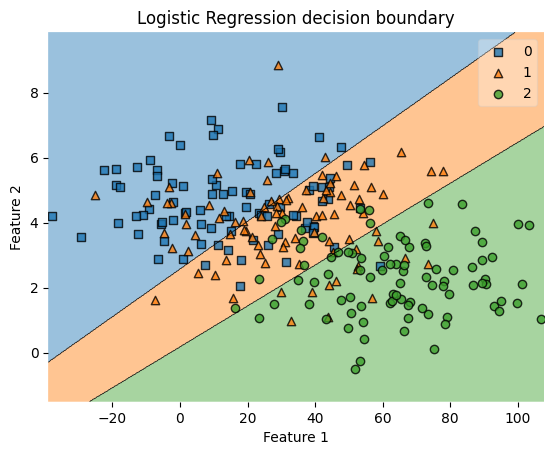

In [42]:
from mlxtend.plotting import plot_decision_regions

# Creating the LR model with best parameters
multi_lr = LogisticRegression(multi_class='multinomial',
                              max_iter=1000,
                              C=2154.4346900318865)

# Fitting the LR model on the trainind dataset in 2D (Var1, Var2)
multi_lr.fit(X_train.iloc[:, 0:2].values, y_train.values)

# Visualizing the decision boundaries of the LR model with best parameters
plot_decision_regions(X_train.iloc[:, 0:2].values, y_train.values, clf=multi_lr)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression decision boundary')
plt.show()

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?

The model is good because it matches the majority of classes. However, it can be further improved as there are some missclassified entries.
